<a href="https://colab.research.google.com/github/hsnam95/my/blob/main/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

folium 임포트하기

In [ ]:
!pip install folium

In [57]:
import folium
print(f"folium Version: {folium.__version__}")

# 위도, 경도
lat, lon = 37.504811111560, 127.025492036104
# 줌 크기
zoom_size = 12

folium Version: 0.12.1.post1


네이버 지도를 배경지도로 설정하기


In [62]:
# 네이버지도 타일 설정
tiles = "https://map.pstatic.net/nrb/styles/basic/1663918673/{z}/{x}/{y}@2x.png?mt=bg.ol.sw"
# 속성 설정
attr = "Naver"
# 지도 객체 생성
m = folium.Map(location = [lat, lon],
               zoom_start = zoom_size,
               tiles = tiles,
               attr = attr)
folium.Marker(location = [lat, lon]).add_to(m)
m

위성지도(satellite)


In [63]:
# 네이버지도 타일 설정
tiles = "https://map.pstatic.net/nrb/styles/satellite/1663918673/{z}/{x}/{y}@2x.png?mt=bg.ol.sw"
# 속성 설정
attr = "Naver"
# 지도 객체 생성
m = folium.Map(location = [lat, lon],
               zoom_start = zoom_size,
               tiles = tiles,
               attr = attr)
folium.Marker(location = [lat, lon]).add_to(m)
m

지형도(terrain)

In [65]:
# 네이버지도 타일 설정
tiles = "https://map.pstatic.net/nrb/styles/terrain/1663918673/{z}/{x}/{y}@2x.png?mt=bg.ol.sw"
# 속성 설정
attr = "Naver"
# 지도 객체 생성
m = folium.Map(location = [lat, lon],
               zoom_start = zoom_size,
               tiles = tiles,
               attr = attr)
folium.Marker(location = [lat, lon]).add_to(m)
m


지적편집도(cadastral)

In [66]:
# 네이버지도 타일 설정
tiles = "https://map.pstatic.net/nrb/styles/basic/1663918673/{z}/{x}/{y}@2x.png?mt=bg.ol.sw.lp"
# 속성 설정
attr = "Naver"
# 지도 객체 생성
m = folium.Map(location = [lat, lon],
               zoom_start = zoom_size,
               tiles = tiles,
               attr = attr)
folium.Marker(location = [lat, lon]).add_to(m)
m

VWORLD

In [67]:
vworld_key="A528478F-752E-3173-B29B-3FCBFFFE5E23"
import folium
import requests

print(f"Folium Version: {folium.__version__}")

Folium Version: 0.12.1.post1


In [69]:
# 지도 중심 경위도 좌표(위도, 경도) 설정하기
lat, lon = 37.504811111562, 127.025492036104
# 줌 설정하기
zoom_size = 18

# folium 지도 생성하기
m = folium.Map(
    location=[lat, lon],
    zoom_start=zoom_size
)

m

In [70]:
def get_data(key, pnuCode):
    # """
    # 연속지적도

    # 종류: 2D 데이터API 2.0
    # 분류: 토지
    # 서비스명: 연속지적도
    # 서비스ID: LP_PA_CBND_BUBUN
    # 제공처: 국토교통부
    # 버전: 1.0
    # - key: Vworld Open API 인증키
    # - pnuCode: PNU코드 19자리
    # """
    import json
    # 엔드포인트
    endpoint = "http://api.vworld.kr/req/data"

    # 요청 파라미터
    service = "data"
    request = "GetFeature"
    data = "LP_PA_CBND_BUBUN"
    page = 1
    size = 1000
    attrFilter = f"pnu:=:{pnuCode}"
    domainURL = "www.mediazen.co.kr/map.html"

    # 요청 URL
    url = f"{endpoint}?service={service}&request={request}&data={data}&key={key}&domain={domainURL}&attrFilter={attrFilter}&page={page}&size={size}"
    # 요청 결과
    res = json.loads(requests.get(url).text)
    # GeoJson 생성
    featureCollection = res["response"]["result"]["featureCollection"]

    return featureCollection

In [71]:
# PNU코드 설정하기 (신논현역 부근에 있는 808타워의 PNU코드)
pnuCode = "1168010100108080000"

# GeoJson 데이터 생성
geo = get_data(vworld_key, pnuCode)
geo

{'type': 'FeatureCollection',
 'bbox': [127.0248605777601,
  37.50419665191351,
  127.02525052203256,
  37.50451024353535],
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[127.02497182851475, 37.504212229177575],
       [127.02492138325304, 37.50419665191351],
       [127.0248605777601, 37.50432397498694],
       [127.02491025383245, 37.5044113619824],
       [127.02492892480727, 37.50444415461651],
       [127.02513025344733, 37.50450385072335],
       [127.02513737914498, 37.50450601169439],
       [127.02515163051302, 37.50451024353535],
       [127.02525052203256, 37.504298399042874],
       [127.02497182851475, 37.504212229177575]]]]},
   'properties': {'pnu': '1168010100108080000',
    'jibun': '808 대',
    'bonbun': '808',
    'bubun': '',
    'addr': '서울특별시 강남구 역삼동 808',
    'gosi_year': '2022',
    'gosi_month': '01',
    'jiga': '78500000'},
   'id': 'LP_PA_CBND_BUBUN.28240522'}]}

In [72]:
# GeoJson 레이어 추가하기
folium.GeoJson(data=geo,
               name="geojson",
               tooltip=folium.GeoJsonTooltip(fields=('pnu', 'addr'),
                                             aliases=('PNU코드', '주소'))
               ).add_to(m)

m

네이버 정적지도

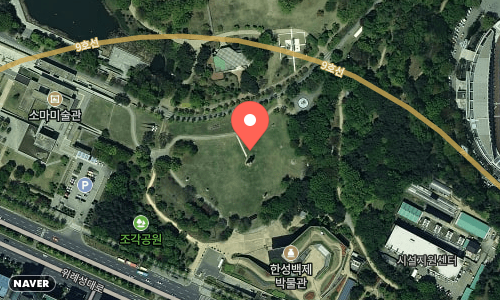

In [73]:
from PIL import Image
import requests
import io

# NCP 콘솔에서 복사한 클라이언트ID와 클라이언트Secret 값
client_id = "2bjysv73pz"
client_secret = "wYmjKK93TxoeoeeivuacadnaPJmzw7N1sI8s7n9b"

# 좌표 (경도, 위도)
endpoint = "https://naveropenapi.apigw.ntruss.com/map-static/v2/raster"
headers = {
    "X-NCP-APIGW-API-KEY-ID": client_id,
    "X-NCP-APIGW-API-KEY": client_secret,
}
# 중심 좌표
lon, lat = "127.120326886309", "37.5164324582415"
_center = f"{lon},{lat}"
# 줌 레벨 - 0 ~ 20
_level = 16
# 가로 세로 크기 (픽셀)
_w, _h = 500, 300
# 지도 유형 - basic, traffic, satellite, satellite_base, terrain
_maptype = "satellite"
# 반환 이미지 형식 - jpg, jpeg, png8, png
_format = "png"
# 고해상도 디스펠레이 지원을 위한 옵션 - 1, 2
_scale = 1
# 마커
_markers = f"""type:d|size:mid|pos:{lon} {lat}|color:red"""
# 라벨 언어 설정 - ko, en, ja, zh
_lang = "ko"
# 대중교통 정보 노출 - Boolean
_public_transit = True
# 서비스에서 사용할 데이터 버전 파라미터 전달 CDN 캐시 무효화
_dataversion = ""

# URL
url = f"{endpoint}?center={_center}&level={_level}&w={_w}&h={_h}&maptype={_maptype}&format={_format}&scale={_scale}&markers={_markers}&lang={_lang}&public_transit={_public_transit}&dataversion={_dataversion}"
res = requests.get(url, headers=headers)

image_data = io.BytesIO(res.content)
image = Image.open(image_data)
image